Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp', u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn', u'marstat', u'fmarstat', u'fmarit', u'evrmarry', u'hisp', u'hispgrp', u'numrace', u'roscnt', u'hplocale', u'manrel', u'fl_rage', u'fl_rrace', u'fl_rhisp', u'goschol', u'vaca', u'higrade', u'compgrd', u'havedip', u'dipged', u'cmhsgrad', u'havedeg', u'degrees', u'wthparnw', u'onown', u'intact', u'parmarr', u'lvsit14f', u'lvsit14m', u'womrasdu', u'momdegre', u'momworkd', u'momchild', u'momfstch', u'mom18', u'manrasdu', u'daddegre', u'bothbiol', u'intact18', u'onown18', u'numbabes', u'totplacd', u'nplaced', u'ndied', u'nadoptv', u'hasbabes', u'cmlastlb', u'cmfstprg', u'cmlstprg', u'menarche', u'pregnowq', u'maybpreg', u'numpregs', u'everpreg', u'currpreg', u'moscurrp', u'giveadpt', u'ngivenad', u'otherkid', u'nothrkid', u'sexothkd', u'relothkd', u'adptotkd', u'tryadopt', u'tryeithr', u'stilhere', u'cmokdcam', u'othkdfos', u'cmokddob', u'othkdspn', u'othkdrac1'

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [4]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)

Display the histogram.

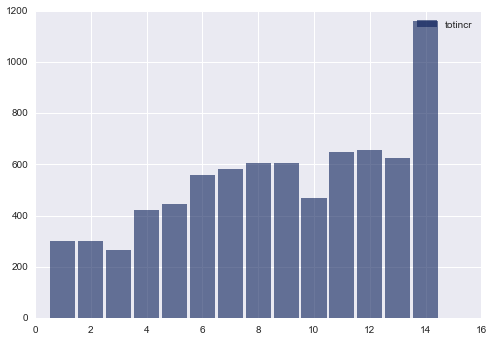

In [5]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

In [6]:
def make_col_hist(col_name='totincr'):
    """Helper function to simplify plotting a histogram of a given df column."""
    hist = thinkstats2.Hist(resp[col_name])

    thinkplot.Hist(hist, label=col_name)
    thinkplot.Show()

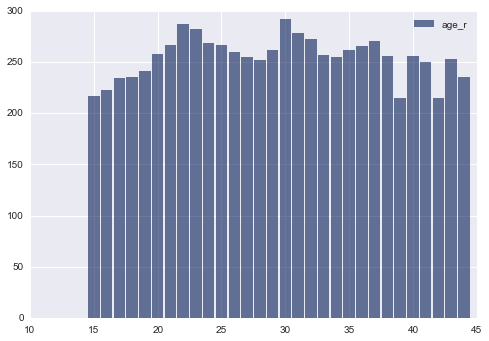

In [7]:
make_col_hist('age_r')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

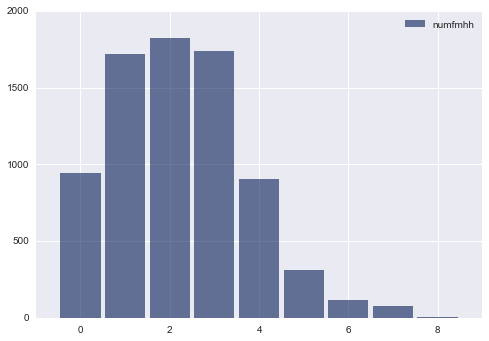

In [8]:
make_col_hist('numfmhh')

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

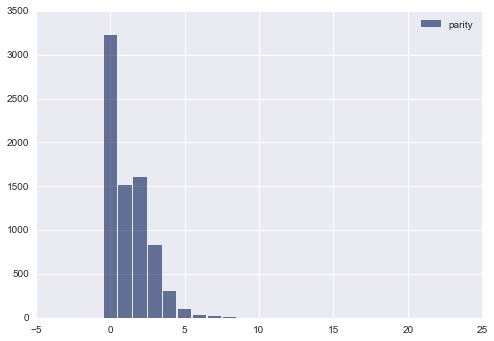

In [9]:
make_col_hist('parity')

The ``parity`` histogram peaks at 0 and decays with increasing count of children (with the exception of 2 children, which is is slightly more common than 3).

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [10]:
hist = thinkstats2.Hist(resp['parity'])

hist.Largest()

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

According to this data, there is a reporting of a birth being the 22nd in that family.

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

In [11]:
# first, the largest values of the 'totincr' column
hist = thinkstats2.Hist(resp['totincr'])

hist.Largest()

[(14, 1160),
 (13, 623),
 (12, 658),
 (11, 647),
 (10, 468),
 (9, 607),
 (8, 606),
 (7, 583),
 (6, 559),
 (5, 445)]

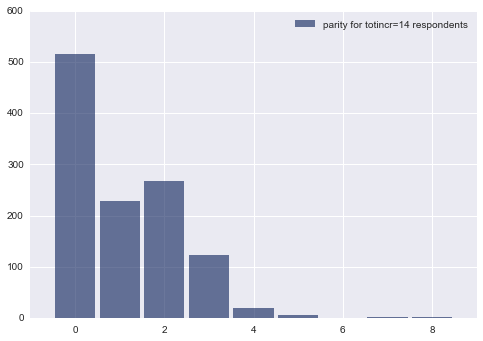

In [12]:
# now, the parity distribution for the highest-income ('tocinr' = 14)
max_inc = max(resp['totincr'])
hist = thinkstats2.Hist( resp[ resp['totincr'] == max_inc]['parity'] )

thinkplot.Hist(hist, label='parity for totincr={} respondents'.format(max_inc))
plt.legend()

Find the largest parities for high income respondents.

In [13]:
thinkstats2.Hist( resp[ resp['totincr'] == max_inc]['parity'] ).Largest()

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [14]:
# get the biggest income
max_inc = max(resp['totincr'])

# subset high-income
highinc = resp[ resp['totincr'] == max_inc]['parity']

# subset everyone else
others = resp[ resp['totincr'] != max_inc]['parity']

In [15]:
print '* high-income parity:\n{}'.format(highinc.describe())
print
print '* others parity:\n{}'.format(others.describe())

* high-income parity:
count    1160.000000
mean        1.075862
std         1.176167
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: parity, dtype: float64

* others parity:
count    6483.000000
mean        1.249576
std         1.423032
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        22.000000
Name: parity, dtype: float64


Investigate any other variables that look interesting.

In [16]:
# what are the columns?
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


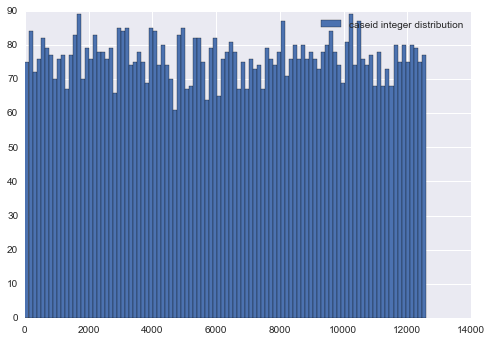

In [17]:
# how uniformly distributed are caseids?
_ = plt.hist(resp['caseid'], bins=100, label='caseid integer distribution')
plt.legend()

## Exercise 2-4

Using the variable ``totalwgt_lb``, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

As a planning exercise, we'll do the following:
- get the code for Cohen's d
- identify the relevant column and value to select "first babies" and "others"
- slice the data for each group
- pass the totalwgt_lb column from each group as args to the Cohen's d function

In [18]:
# first grab the code for Cohen's d from chapter 2
import math

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [19]:
# find the right column -- recall from chapter 2 we did a similar exercise
import nsfg

In [20]:
preg = nsfg.ReadFemPreg()

nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


In [21]:
live = preg[preg.outcome == 1]

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [22]:
firsts.columns
#firsts['totalwgt_lb'].head()

Index([u'caseid', u'pregordr', u'howpreg_n', u'howpreg_p', u'moscurrp', u'nowprgdk', u'pregend1', u'pregend2', u'nbrnaliv', u'multbrth', u'cmotpreg', u'prgoutcome', u'cmprgend', u'flgdkmo1', u'cmprgbeg', u'ageatend', u'hpageend', u'gestasun_m', u'gestasun_w', u'wksgest', u'mosgest', u'dk1gest', u'dk2gest', u'dk3gest', u'bpa_bdscheck1', u'bpa_bdscheck2', u'bpa_bdscheck3', u'babysex', u'birthwgt_lb', u'birthwgt_oz', u'lobthwgt', u'babysex2', u'birthwgt_lb2', u'birthwgt_oz2', u'lobthwgt2', u'babysex3', u'birthwgt_lb3', u'birthwgt_oz3', u'lobthwgt3', u'cmbabdob', u'kidage', u'hpagelb', u'birthplc', u'paybirth1', u'paybirth2', u'paybirth3', u'knewpreg', u'trimestr', u'ltrimest', u'priorsmk', u'postsmks', u'npostsmk', u'getprena', u'bgnprena', u'pnctrim', u'lpnctri', u'workpreg', u'workborn', u'didwork', u'matweeks', u'weeksdk', u'matleave', u'matchfound', u'livehere', u'alivenow', u'cmkidied', u'cmkidlft', u'lastage', u'wherenow', u'legagree', u'parenend', u'anynurse', u'fedsolid', u'frstea

In [23]:
col = 'totalwgt_lb'

CohenEffectSize(firsts[col], others[col])

-0.088672927072601701

Here, the coefficient comes out to be -0.089 standard deviations. Recall that the different in height between men and women is about 1.7 standard deviations.

In [27]:
col = 'prglngth'

CohenEffectSize(firsts[col], others[col])

0.028879044654449841

We see the Cohen's ``d`` for pregnancy length is quite a bit smaller than that for birth weight.